In [2]:
# Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SVM Accuracy: 0.3953488372093023
[[ 9  0  0  0  0  0]
 [16  2  0  1  0  0]
 [ 5  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.30      1.00      0.46         9
           2       0.33      0.11      0.16        19
           3       1.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       1.00      0.00      0.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.40        43
   macro avg       0.61      0.35      0.27        43
weighted avg       0.51      0.40      0.31        43



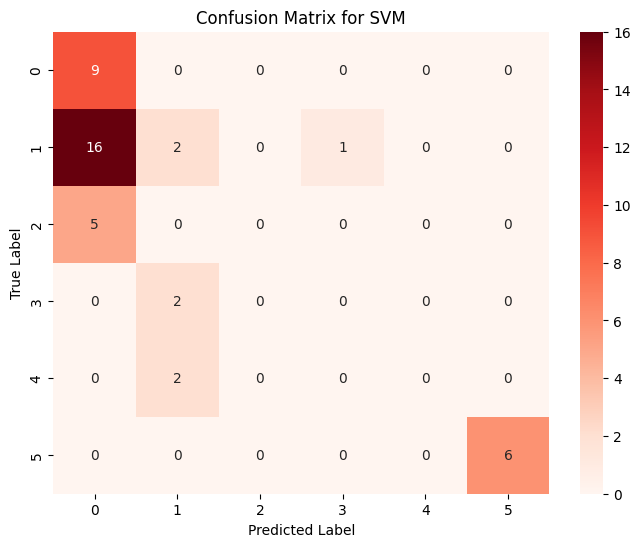

In [38]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
url = 'https://drive.google.com/uc?id={}'.format('1cau0ol63D2PxRQ9jf-PTqWrpaW6vZSAu')
glass_data = pd.read_csv(url)

# Preprocessing
# Normalizing the features
scaler = MinMaxScaler()
X = scaler.fit_transform(glass_data.drop(columns=['Type']))
y = glass_data['Type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SVM Classifier
# Creating and training the model
clf = SVC(kernel='linear', random_state=0)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
svm_accuracy = clf.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy:}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))


# Visualization
svm_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ANN Accuracy: 0.6511627906976745
[[ 5  3  1  0  0  0]
 [ 6 12  1  0  0  0]
 [ 1  3  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.42      0.56      0.48         9
           2       0.67      0.63      0.65        19
           3       0.33      0.20      0.25         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.65        43
   macro avg       0.74      0.73      0.73        43
weighted avg       0.65      0.65      0.65        43



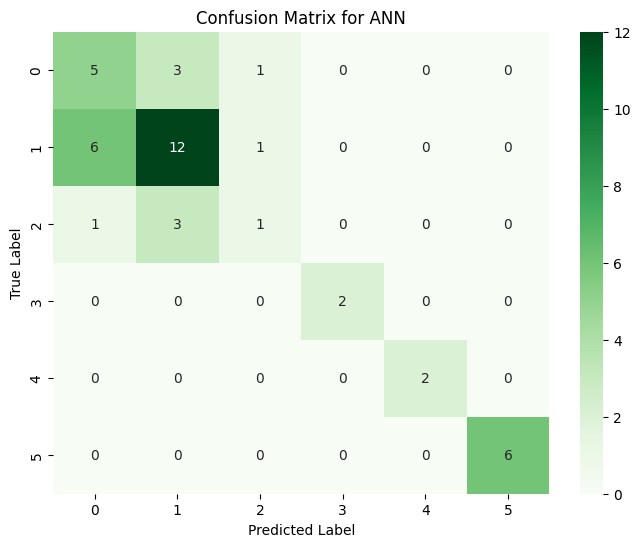

In [34]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
url = 'https://drive.google.com/uc?id={}'.format('1cau0ol63D2PxRQ9jf-PTqWrpaW6vZSAu')
glass_data = pd.read_csv(url)

# Preprocessing
# Normalizing the features
scaler = MinMaxScaler()
X = scaler.fit_transform(glass_data.drop(columns=['Type']))
y = glass_data['Type']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Neural Network Classifier (ANN)
# Creating and training the model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, random_state=0)
mlp.fit(X_train, y_train)

# Making predictions
predict_test = mlp.predict(X_test)

# Evaluating the model
ann_accuracy = accuracy_score(y_test, predict_test)
print(f"ANN Accuracy: {ann_accuracy:}")
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

# Visualization
mlp_cm = confusion_matrix(y_test, predict_test)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Conclusion:**

The SVM model achieves an accuracy of, around **0.40**.

On the hand the ANN model demonstrates an accuracy of **0.65**.

When it comes to the Glass dataset the ANN model **outperforms** the SVM model by a margin.

1.   The ANN model has the ability to capture linear patterns that may exist within the dataset something that cannot be adequately handled by the linear kernel used in the SVM model.
2.   In terms of structure and parameters the ANN model is more complex compared to its counterpart, SVM. This complexity allows for modeling of relationships within the data resulting in improved performance.
3. Neural networks like ANN are better suited for datasets like Glass due to their ability to uncover hidden patterns and handle linear relationships that might not be easily captured by linear models such as SVM.

To summarize, based on our observations of accuracy and other metrics we can conclude that the ANN model is more suitable, for handling the Glass dataset.
